In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, LSTM, Input, Reshape, Conv2D, 
                                     MaxPooling2D, BatchNormalization, TimeDistributed)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

# Settings
IMG_SIZE = (48, 48)
BATCH_SIZE = 64
EPOCHS = 20
train_dir = 'C:/Users/kavin/Downloads/train/'
test_dir = 'C:/Users/kavin/Downloads/test/'
# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    shuffle=True,
    color_mode='grayscale',
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    shuffle=False,
    color_mode='grayscale',
    class_mode='categorical'
)

# Define input layer
input_layer = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 1))

# Repeat channel to make it compatible with MobileNetV2
x = tf.keras.layers.Concatenate()([input_layer] * 3)

# Pretrained CNN - MobileNetV2
base_model = MobileNetV2(input_shape=(48, 48, 3), include_top=False, weights='imagenet')
base_model.trainable = False
x = base_model(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# Reshape for LSTM
x = Reshape((1, 128))(x)
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.4)(x)
x = LSTM(32)(x)
x = Dropout(0.4)(x)

# Output layer
output_layer = Dense(training_set.num_classes, activation='softmax')(x)

# Model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
training_result = model.fit(
    training_set,
    validation_data=test_set,
    epochs=EPOCHS
)

# Save model
model.save("hybrid_emotion_model_transfer.h5")

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_result.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(training_result.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(training_result.history['loss'], label='Training Loss', marker='o')
plt.plot(training_result.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Predict on test set
y_pred = model.predict(test_set)
y_true = test_set.classes
predicted_classes = np.argmax(y_pred, axis=1)

# F1 Score
f1 = f1_score(y_true, predicted_classes, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")

       happy   sad
Train   7215  4830
      happy   sad
Test   1774  1247


<Axes: >

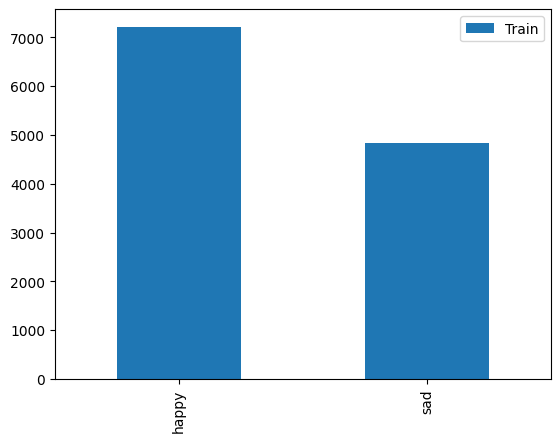

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Define the path to your dataset
train_dir = 'C:/Users/kavin/Downloads/train/'
test_dir = 'C:/Users/kavin/Downloads/test/'
row, col = 48, 48
classes = 7
def count_exp(path, set_):
    dict = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        if(expression=='happy' or expression=='sad'): 
            dict [expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict, index=[set_])
    return df
train_count = count_exp(train_dir, 'Train')
test_count = count_exp(test_dir, 'Test')
print(train_count)
print(test_count)
train_count.transpose().plot(kind='bar')

       angry  disgust  fear  happy  neutral   sad  surprise
Train   3995     4000  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
Test    958      111  1024   1774     1233  1247       831


<Axes: >

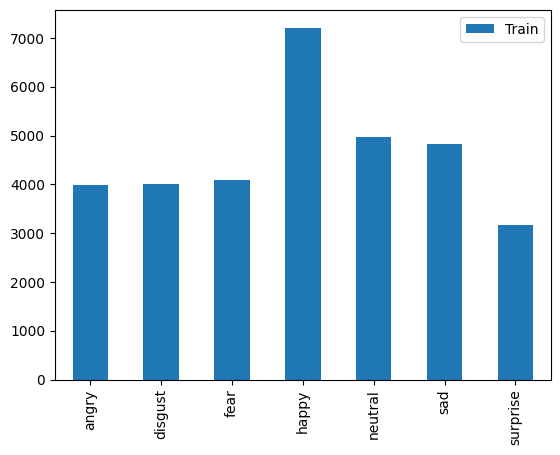

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Define the path to your dataset
train_dir = 'C:/Users/kavin/Downloads/train/'

test_dir = 'C:/Users/kavin/Downloads/test/'
row, col = 48, 48
classes = 7
def count_exp(path, set_):
    dict = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict [expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict, index=[set_])
    return df
train_count = count_exp(train_dir, 'Train')
test_count = count_exp(test_dir, 'Test')
print(train_count)
print(test_count)
train_count.transpose().plot(kind='bar')

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,     
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='binary',           
    shuffle=True,
    classes=['happy', 'sad']
)

test_generator = datagen.flow_from_directory(
    test_dir,          
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='binary',          
    shuffle=False,
    classes=['happy', 'sad']
)


Found 12045 images belonging to 2 classes.
Found 3021 images belonging to 2 classes.


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


# Define the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())


C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,486,017 (9.48 MB)

 Trainable params: 2,486,017 (9.48 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:

history1 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator)


In [45]:
# Compute F1-Score on Test Data
y_true = []
y_pred = []
for i in range(len(test_generator)):
    batch_x, batch_y = test_generator[i]
    preds = model.predict(batch_x) 

    print(f"Shape of batch_y: {batch_y.shape}")  # Debugging step

    # Handling binary or one-hot encoded ground truth
    if batch_y.ndim == 1:  # Already categorical labels
        y_true.extend(batch_y)
    elif batch_y.shape[-1] == 1:  # Binary labels stored as (batch_size, 1)
        y_true.extend(batch_y.flatten())  
    else:  # One-hot encoded (batch_size, num_classes)
        y_true.extend(np.argmax(batch_y, axis=1))

    # Handling binary or one-hot encoded predictions
    if preds.shape[-1] == 1:  # Sigmoid output (binary classification)
        y_pred.extend((preds.flatten() > 0.5).astype(int))  
    else:  # Softmax output (multi-class)
        y_pred.extend(np.argmax(preds, axis=1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Shape of batch_y: (64,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Shape of batch_y: (64,)
2/2 ━━━


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      1774
         1.0       0.89      0.82      0.85      1247

    accuracy                           0.88      3021
   macro avg       0.88      0.87      0.88      3021
weighted avg       0.88      0.88      0.88      3021



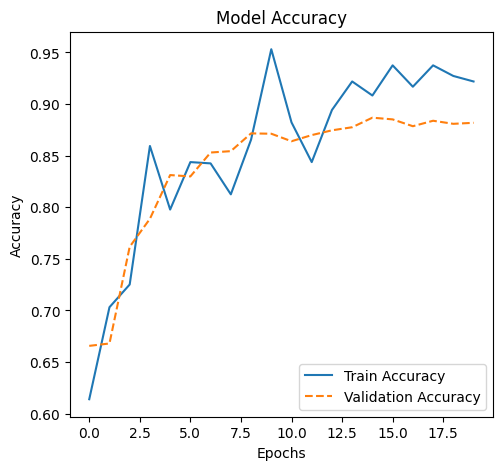

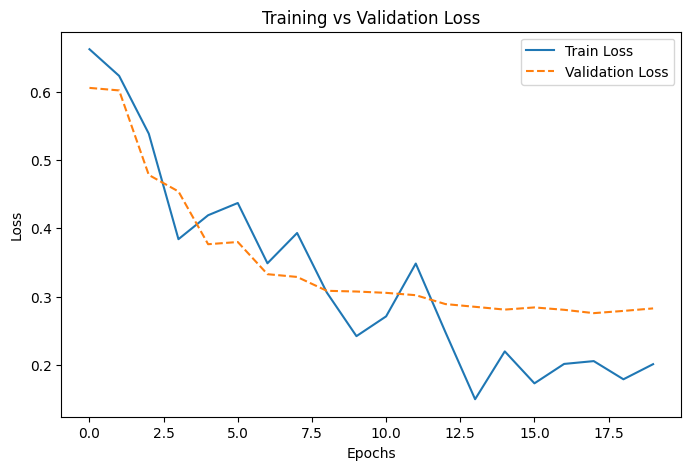

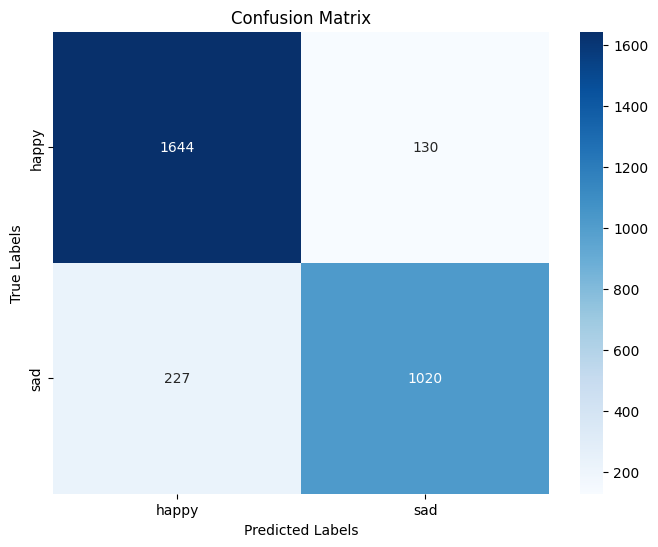

In [46]:
from sklearn.metrics import f1_score, classification_report,confusion_matrix
import seaborn as sns

print("\nClassification Report:\n", classification_report(y_true, y_pred))

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [1]:
train_datagen = ImageDataGenerator (rescale=1./255,
    zoom_range=0.3,
    horizontal_flip=True)
training_set = train_datagen.flow_from_directory(train_dir,
    batch_size=64,
    target_size=(48,48),
    shuffle=True,
    color_mode='grayscale',
    class_mode='categorical')
test_datagen = ImageDataGenerator (rescale=1./255)
test_set = test_datagen.flow_from_directory (test_dir,
    batch_size=64,
    target_size=(48,48),
    shuffle=True,
    color_mode='grayscale',
    class_mode='categorical')


NameError: name 'ImageDataGenerator' is not defined

In [48]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [49]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

batch_size=64
history = model.fit(
    training_set,
    steps_per_epoch=training_set.n // batch_size,
    epochs=40,
    validation_data=test_set,
    validation_steps=test_set.n // batch_size
)

Epoch 1/40


C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.2268 - loss: 1.8961

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


504/504 ━━━━━━━━━━━━━━━━━━━━ 470s 911ms/step - accuracy: 0.2269 - loss: 1.8960 - val_accuracy: 0.3923 - val_loss: 1.5704
Epoch 2/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 1:59 237ms/step - accuracy: 0.3594 - loss: 1.6451

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.3594 - loss: 1.6451 - val_accuracy: 0.3000 - val_loss: 1.6199
Epoch 3/40
278/504 ━━━━━━━━━━━━━━━━━━━━ 1:34 416ms/step - accuracy: 0.3632 - loss: 1.6559

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


504/504 ━━━━━━━━━━━━━━━━━━━━ 232s 458ms/step - accuracy: 0.3753 - loss: 1.6278 - val_accuracy: 0.4739 - val_loss: 1.3786
Epoch 4/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 2:07 253ms/step - accuracy: 0.4688 - loss: 1.5212

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.4688 - loss: 1.5212 - val_accuracy: 0.6000 - val_loss: 1.4571
Epoch 5/40
400/504 ━━━━━━━━━━━━━━━━━━━━ 46s 446ms/step - accuracy: 0.4579 - loss: 1.4318

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


504/504 ━━━━━━━━━━━━━━━━━━━━ 247s 489ms/step - accuracy: 0.4604 - loss: 1.4252 - val_accuracy: 0.5066 - val_loss: 1.2857
Epoch 6/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 1:55 230ms/step - accuracy: 0.5781 - loss: 1.2637

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - accuracy: 0.5781 - loss: 1.2637 - val_accuracy: 0.5000 - val_loss: 1.2910
Epoch 7/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 236s 467ms/step - accuracy: 0.5028 - loss: 1.3237 - val_accuracy: 0.5460 - val_loss: 1.1954
Epoch 8/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 2:53 345ms/step - accuracy: 0.5469 - loss: 1.1141

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5469 - loss: 1.1141 - val_accuracy: 0.5000 - val_loss: 1.0209
Epoch 9/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 259s 512ms/step - accuracy: 0.5348 - loss: 1.2304 - val_accuracy: 0.5548 - val_loss: 1.1689
Epoch 10/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 3:48 455ms/step - accuracy: 0.6250 - loss: 1.0645

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 222us/step - accuracy: 0.6250 - loss: 1.0645 - val_accuracy: 0.5000 - val_loss: 1.2157
Epoch 11/40
234/504 ━━━━━━━━━━━━━━━━━━━━ 2:00 445ms/step - accuracy: 0.5507 - loss: 1.1971

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


504/504 ━━━━━━━━━━━━━━━━━━━━ 254s 503ms/step - accuracy: 0.5532 - loss: 1.1876 - val_accuracy: 0.5724 - val_loss: 1.1220
Epoch 12/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 3:34 426ms/step - accuracy: 0.5000 - loss: 1.3313

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.5000 - loss: 1.3313 - val_accuracy: 0.7000 - val_loss: 0.8564
Epoch 13/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 248s 490ms/step - accuracy: 0.5759 - loss: 1.1325 - val_accuracy: 0.5730 - val_loss: 1.1216
Epoch 14/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 2:03 246ms/step - accuracy: 0.6094 - loss: 1.0309

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.6094 - loss: 1.0309 - val_accuracy: 0.8000 - val_loss: 0.9020
Epoch 15/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 234s 463ms/step - accuracy: 0.5816 - loss: 1.1023 - val_accuracy: 0.5797 - val_loss: 1.1115
Epoch 16/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 2:47 333ms/step - accuracy: 0.6406 - loss: 1.0048

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.6406 - loss: 1.0048 - val_accuracy: 0.4000 - val_loss: 1.2916
Epoch 17/40
430/504 ━━━━━━━━━━━━━━━━━━━━ 32s 444ms/step - accuracy: 0.5976 - loss: 1.0703

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


504/504 ━━━━━━━━━━━━━━━━━━━━ 245s 483ms/step - accuracy: 0.5977 - loss: 1.0701 - val_accuracy: 0.5933 - val_loss: 1.0922
Epoch 18/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 2:03 245ms/step - accuracy: 0.5469 - loss: 1.0797

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.5469 - loss: 1.0797 - val_accuracy: 0.7000 - val_loss: 1.0115
Epoch 19/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 340s 672ms/step - accuracy: 0.6054 - loss: 1.0517 - val_accuracy: 0.5936 - val_loss: 1.0891
Epoch 20/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 3:31 421ms/step - accuracy: 0.6094 - loss: 1.1257

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.6094 - loss: 1.1257 - val_accuracy: 0.8000 - val_loss: 0.5886
Epoch 21/40
362/504 ━━━━━━━━━━━━━━━━━━━━ 1:29 628ms/step - accuracy: 0.6229 - loss: 1.0198

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


504/504 ━━━━━━━━━━━━━━━━━━━━ 348s 687ms/step - accuracy: 0.6210 - loss: 1.0221 - val_accuracy: 0.6010 - val_loss: 1.0594
Epoch 22/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 3:47 452ms/step - accuracy: 0.5938 - loss: 1.1282

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.5938 - loss: 1.1282 - val_accuracy: 0.7000 - val_loss: 1.0078
Epoch 23/40
 95/504 ━━━━━━━━━━━━━━━━━━━━ 3:21 494ms/step - accuracy: 0.6261 - loss: 0.9905

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


504/504 ━━━━━━━━━━━━━━━━━━━━ 284s 562ms/step - accuracy: 0.6214 - loss: 1.0009 - val_accuracy: 0.5958 - val_loss: 1.0735
Epoch 24/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 3:23 405ms/step - accuracy: 0.5469 - loss: 1.2830

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.5469 - loss: 1.2830 - val_accuracy: 0.6000 - val_loss: 1.0233
Epoch 25/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 294s 580ms/step - accuracy: 0.6213 - loss: 0.9985 - val_accuracy: 0.6119 - val_loss: 1.0538
Epoch 26/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 3:51 459ms/step - accuracy: 0.5156 - loss: 1.1967

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 231us/step - accuracy: 0.5156 - loss: 1.1967 - val_accuracy: 0.8000 - val_loss: 0.7944
Epoch 27/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 306s 605ms/step - accuracy: 0.6372 - loss: 0.9640 - val_accuracy: 0.6098 - val_loss: 1.0412
Epoch 28/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - accuracy: 0.6719 - loss: 0.8434 - val_accuracy: 0.4000 - val_loss: 1.2651
Epoch 29/40


C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 289s 571ms/step - accuracy: 0.6390 - loss: 0.9533 - val_accuracy: 0.6116 - val_loss: 1.0349
Epoch 30/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 3:44 446ms/step - accuracy: 0.5938 - loss: 0.8838

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.5938 - loss: 0.8838 - val_accuracy: 0.5000 - val_loss: 1.0861
Epoch 31/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 318s 629ms/step - accuracy: 0.6391 - loss: 0.9565 - val_accuracy: 0.6045 - val_loss: 1.0674
Epoch 32/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 3:47 452ms/step - accuracy: 0.7344 - loss: 0.7417

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.7344 - loss: 0.7417 - val_accuracy: 0.6000 - val_loss: 1.5764
Epoch 33/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 391s 774ms/step - accuracy: 0.6457 - loss: 0.9399 - val_accuracy: 0.6138 - val_loss: 1.0286
Epoch 34/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 11:40 1s/step - accuracy: 0.6250 - loss: 1.0070

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 607us/step - accuracy: 0.6250 - loss: 1.0070 - val_accuracy: 0.9000 - val_loss: 0.3602
Epoch 35/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 427s 842ms/step - accuracy: 0.6529 - loss: 0.9165 - val_accuracy: 0.6201 - val_loss: 1.0276
Epoch 36/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 4:54 586ms/step - accuracy: 0.5938 - loss: 1.1395

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.5938 - loss: 1.1395 - val_accuracy: 1.0000 - val_loss: 0.2868
Epoch 37/40
349/504 ━━━━━━━━━━━━━━━━━━━━ 2:09 837ms/step - accuracy: 0.6593 - loss: 0.9107

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


504/504 ━━━━━━━━━━━━━━━━━━━━ 394s 779ms/step - accuracy: 0.6589 - loss: 0.9097 - val_accuracy: 0.6177 - val_loss: 1.0383
Epoch 38/40
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 183us/step - accuracy: 0.6406 - loss: 1.0265 - val_accuracy: 0.6000 - val_loss: 1.8139
Epoch 39/40


C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


397/504 ━━━━━━━━━━━━━━━━━━━━ 59s 555ms/step - accuracy: 0.6596 - loss: 0.9010 

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


504/504 ━━━━━━━━━━━━━━━━━━━━ 297s 587ms/step - accuracy: 0.6593 - loss: 0.9023 - val_accuracy: 0.6197 - val_loss: 1.0250
Epoch 40/40
  1/504 ━━━━━━━━━━━━━━━━━━━━ 4:32 542ms/step - accuracy: 0.6562 - loss: 0.8860

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 303us/step - accuracy: 0.6562 - loss: 0.8860 - val_accuracy: 0.6000 - val_loss: 1.1110


In [50]:
# Compute F1-Score on Test Data
y_true = []
y_pred = []

for i in range(len(test_set)):
    batch_x, batch_y = test_set[i]
    preds = model.predict(batch_x) 
    y_true.extend(np.argmax(batch_y, axis=1)) 
    y_pred.extend(np.argmax(preds, axis=1))  



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 


Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.48      0.52       958
           1       0.56      0.71      0.62       111
           2       0.44      0.39      0.41      1024
           3       0.81      0.85      0.83      1774
           4       0.57      0.59      0.58      1233
           5       0.49      0.53      0.51      1247
           6       0.74      0.75      0.74       831

    accuracy                           0.62      7178
   macro avg       0.60      0.61      0.60      7178
weighted avg       0.62      0.62      0.62      7178



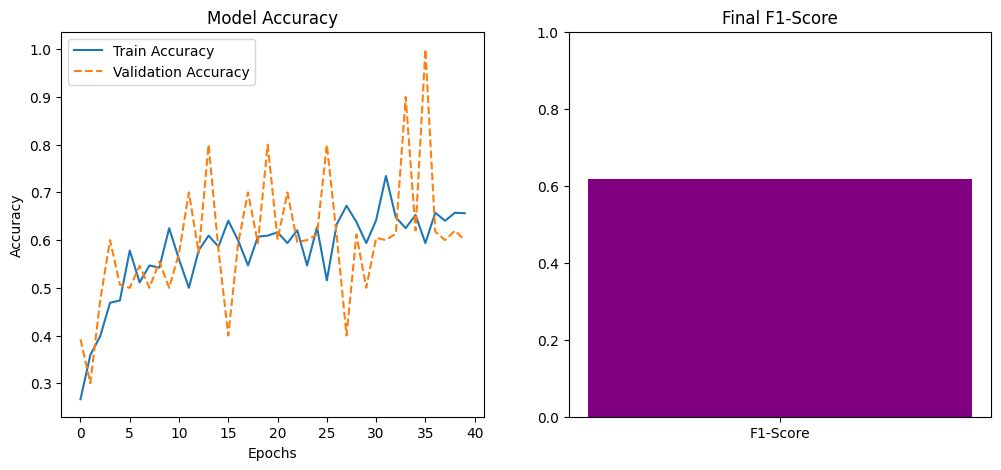

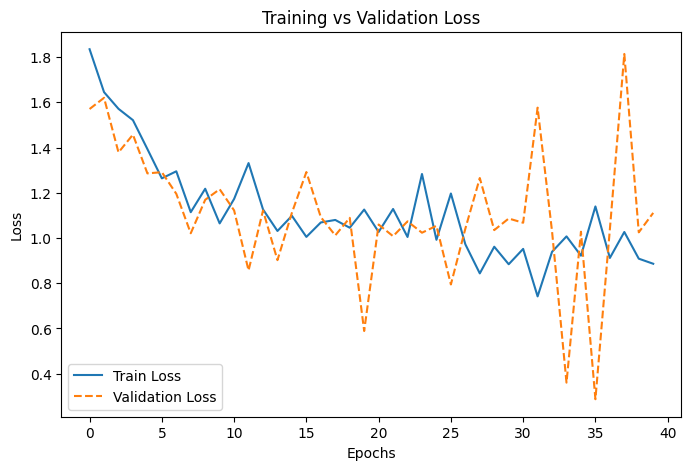

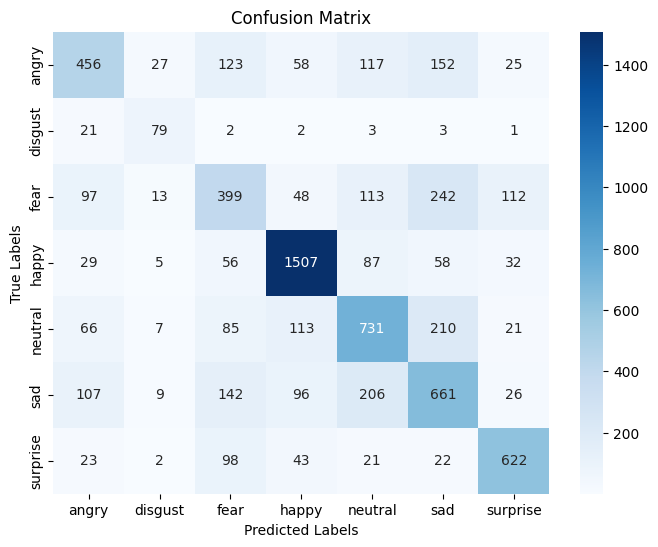

In [52]:
from sklearn.metrics import f1_score, classification_report,confusion_matrix
import seaborn as sns

print("\nClassification Report:\n", classification_report(y_true, y_pred))

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# F1-Score Plot
plt.subplot(1, 2, 2)
plt.bar(['F1-Score'], [f1], color='purple')
plt.ylim(0, 1)
plt.title('Final F1-Score')

plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, LSTM, Input, Reshape, Conv2D, 
                                     MaxPooling2D, Lambda, BatchNormalization)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Settings
IMG_SIZE = (96, 96)
BATCH_SIZE = 64
EPOCHS = 20
train_dir = 'C:/Users/kavin/Downloads/train/'

test_dir = 'C:/Users/kavin/Downloads/test/'
# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    shuffle=False,
    color_mode='rgb',
    class_mode='categorical'
)

# Define model
input_layer = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Transfer learning base model
base_model = MobileNetV2(include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), weights='imagenet')
base_model.trainable = False  # Freeze all layers for faster training

x = base_model(input_layer)

# Enhanced CNN Feature extraction
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Reshape for LSTM
x = Reshape((-1, x.shape[-1]))(x)
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.4)(x)
x = LSTM(32)(x)
x = Dropout(0.4)(x)

# Output layer
output_layer = Dense(training_set.num_classes, activation='softmax')(x)

# Model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
training_result = model.fit(
    training_set,
    validation_data=test_set,
    epochs=EPOCHS
)

# Save model
model.save("hybrid_emotion_model_optimized.h5")

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_result.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(training_result.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict on test set
y_pred = model.predict(test_set)
y_true = test_set.classes
predicted_classes = np.argmax(y_pred, axis=1)

# F1 Score
f1 = f1_score(y_true, predicted_classes, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")


Found 32273 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.2079 - loss: 1.9261

In [29]:
print("Classes:", training_set.class_indices)
print("Train samples:", training_set.samples)
print("Test samples:", test_set.samples)
print("Training batches per epoch:", len(training_set))
print("Validation batches per epoch:", len(test_set))


Classes: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Train samples: 32273
Test samples: 7178
Training batches per epoch: 505
Validation batches per epoch: 113
